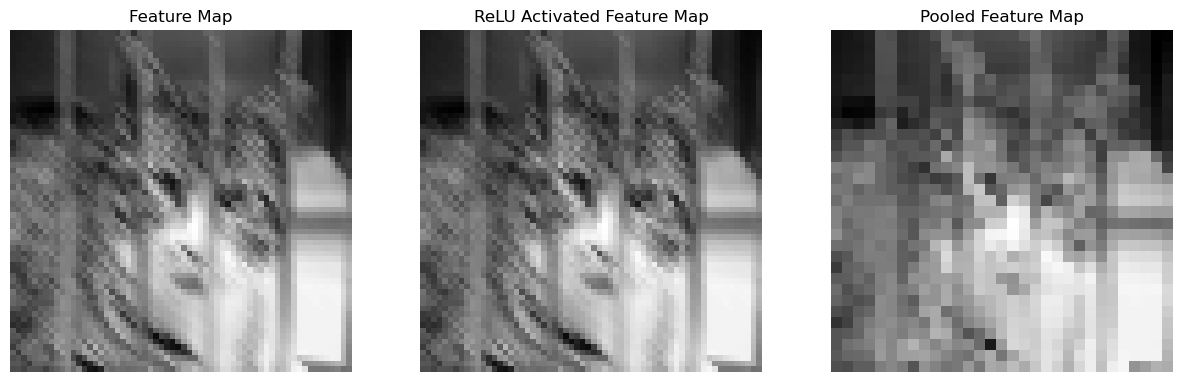

Original Feature Map Shape: (62, 62)
ReLU Feature Map Shape: (62, 62)
Pooled Feature Map Shape: (31, 31)
The pooling operation reduces size and retains dominant features.


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) 
    image = cv2.resize(image, (64, 64)) 
    image = image.astype(np.float32) / 255.0 
    return image

image_path = "C:\\Users\\Dharani Ravi\\Pictures\\WhatsApp Image 2025-03-04 at 10.19.02_e1a2f258.jpg"  
image = load_image(image_path)

filter_3x3 = np.array([[1, 0, 0],
                        [0, 1, 0],
                        [0, 0, 1]], dtype=np.float32)

kernel = filter_3x3.reshape(3, 3, 1, 1)

image_tensor = tf.convert_to_tensor(image.reshape(1, 64, 64, 1), dtype=tf.float32)
kernel_tensor = tf.convert_to_tensor(kernel, dtype=tf.float32)

feature_map = tf.nn.conv2d(image_tensor, kernel_tensor, strides=[1, 1, 1, 1], padding='VALID')

feature_map_relu = tf.nn.relu(feature_map)

pool_size = [1, 2, 2, 1]
strides = [1, 2, 2, 1]
feature_map_pooled = tf.nn.max_pool(feature_map_relu, ksize=pool_size, strides=strides, padding='VALID')

feature_map = feature_map.numpy().squeeze()
feature_map_relu = feature_map_relu.numpy().squeeze()
feature_map_pooled = feature_map_pooled.numpy().squeeze()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(feature_map, cmap='gray')
plt.title("Feature Map")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(feature_map_relu, cmap='gray')
plt.title("ReLU Activated Feature Map")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(feature_map_pooled, cmap='gray')
plt.title("Pooled Feature Map")
plt.axis("off")

plt.show()

print("Original Feature Map Shape:", feature_map.shape)
print("ReLU Feature Map Shape:", feature_map_relu.shape)
print("Pooled Feature Map Shape:", feature_map_pooled.shape)
print("The pooling operation reduces size and retains dominant features.")


In [6]:
#TASK 3

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = (32, 32) 
BATCH_SIZE = 32

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

import numpy as np
train_filter = (train_labels == 3) | (train_labels == 5)
test_filter = (test_labels == 3) | (test_labels == 5)

train_images, train_labels = train_images[train_filter.squeeze()], train_labels[train_filter.squeeze()]
test_images, test_labels = test_images[test_filter.squeeze()], test_labels[test_filter.squeeze()]

train_images, test_images = train_images / 255.0, test_images / 255.0

train_labels = (train_labels == 5).astype(np.int32)
test_labels = (test_labels == 5).astype(np.int32)

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=2)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=2)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 100s 1us/step


In [8]:
model = models.Sequential([
    layers.Conv2D(filters=3, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=3, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=3, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),  
    layers.Dense(2, activation='softmax') 
])

# Show model summary
model.summary()


C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 3)           │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 3)           │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 3)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 3)             │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 3)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 278 (1.09 KB)

 Trainable params: 278 (1.09 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.5232 - loss: 0.6905 - val_accuracy: 0.5875 - val_loss: 0.6817
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5914 - loss: 0.6801 - val_accuracy: 0.5955 - val_loss: 0.6698
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.5849 - loss: 0.6727 - val_accuracy: 0.5940 - val_loss: 0.6650
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6011 - loss: 0.6633 - val_accuracy: 0.5910 - val_loss: 0.6683
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5980 - loss: 0.6613 - val_accuracy: 0.6145 - val_loss: 0.6575


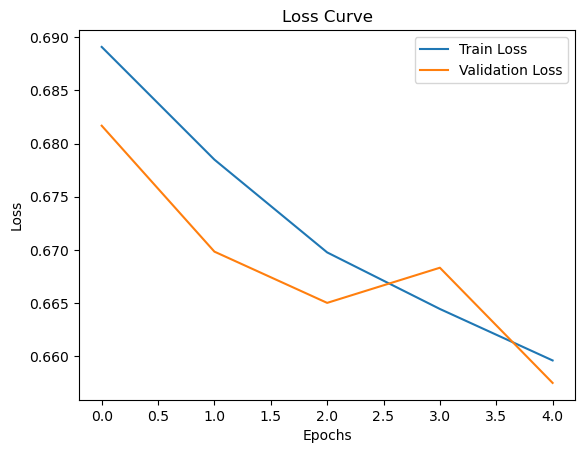

In [12]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()


In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6080 - loss: 0.6623
Test Accuracy: 0.6145
